# Assembling

This notebook is used to assemble a processable h5ad object for subsequent notebooks.

## Fill in input data, output and settings

In [45]:
####################### TEST NAME ###################################
test = 'all'
################### DEFINING STRATEGY ###############################
from_h5ad = True #option 1
assembling_10_velocity = False #option 2
assembling_10_public = False #option 3
convert_seurat = False #option 4

###################### INPUT DATA ###################################

# For option 1: The path to an existing .h5ad file
h5ad_files = ['/mnt/agnerds/PROJECTS/extern/ext442_scATAC_Glaser_11_22/preprocessing_output/data/sample3/sample3_annotated_peaks.h5ad']
#h5ad_files = ['/mnt/agnerds/PROJECTS/extern/ext442_scATAC_Glaser_11_22/preprocessing_output/data/all_annotated_peaks.h5ad']
from_snapatac = False # This is True when the sample is preprocessed using SnapATAC

# Manually set existing QC Columns
n_features_by_counts = None
log1p_n_features_by_counts = None
total_counts = None
log1p_total_counts = None
mean_insertsize = None
insertsize_count = None
n_total_fragments = None
n_fragments_in_promoters = None
pct_fragments_in_promoters = None
blacklist_overlaps = None
# total_number_of_fragments
TN = None # 'TN'
# uniquely_mapped_fragments
UM = None # 'UM'
# properly_paired_fragments
PP = None # 'PP'
# uniq_fragments
UQ = None # 'UQ'
# chrM_fragments
CM = None # 'CM'

#################### Calc QC Columns ###############################
# set available number of threads
n_threads = 8

# Step 1: QC Metrics
calc_qc_metrics = True # set True if the QC metrics should be calculated 

# Step 2: Mean Insertsizes
calc_mean_insertsize = True # set True if the mean insertsize should be calculated
use_bam = True # False if fragments should be used
barcode_tag = 'SB' # set the tag where to find the barcode to use
# if the mean_insertsize should be calculated specify either a BAM file or a fragments file:
bam_file = '/mnt/workspace/jdetlef/ext_ana/ext442/sample3.filter.bam' # specify bamfile of the corresponding alignment
fragments_file = None # specify fragments file (if this is possible use the fragments file directly)

# Step 3: Promotor-enrichment
calc_promotor_enrichment = False # set True if the promotor-enrichment should be calculated
# specify promotors_gtf if another promoter than the fixed ones should be used
# if promotors is None please specify species
# promoters_gtf =  '/mnt/flatfiles/organisms/new_organism/homo_sapiens/104/homo_sapiens.104.promoters2000.gtf'
promoters_gtf = '/mnt/workspace/jdetlef/ext_ana/mus_musculus.104.promoters2000.gtf'
species = None

##################### OUTPUT DATA ###################################
output_dir = '/mnt/workspace/jdetlef/ext_ana/processed' # specify the output directory of the processing

## Import modules

In [46]:
# sctoolbox modules 
import sctoolbox.atac_tree as sub_tree
import sctoolbox.creators as cr
import sctoolbox.fragment_length as fragments
import sctoolbox.atac as atac
import sctoolbox.calc_overlap_pct as overlap
import sctoolbox.analyser 
from sctoolbox.qc_filter import *
from sctoolbox.atac_utils import *
# import episcanpy
import episcanpy as epi

## Setup path handling object 

In [47]:
# make an instance of the class
tree = sub_tree.ATAC_tree()
# set processing/output directory
tree.processing_dir = output_dir
# set sample/experiment.. 
tree.run = test

all directories existing
all directories existing


## Read in data

### Option 1: Read from .h5ad

In [48]:
qc_columns = {}
qc_columns["n_features_by_counts"] = n_features_by_counts
qc_columns["log1p_n_features_by_counts"] = log1p_n_features_by_counts
qc_columns["total_counts"] = total_counts
qc_columns["log1p_total_counts"] = log1p_total_counts
qc_columns["mean_insertsize"] = mean_insertsize
qc_columns['n_total_fragments'] = n_total_fragments
qc_columns['n_fragments_in_promoters'] = n_fragments_in_promoters
qc_columns['pct_fragments_in_promoters'] = pct_fragments_in_promoters
qc_columns["blacklist_overlaps"] = blacklist_overlaps
qc_columns["TN"] = TN
qc_columns["UM"] = UM
qc_columns["PP"] = PP
qc_columns["UQ"] = UQ
qc_columns["CM"] = CM

In [49]:
if from_h5ad:
    
    adata = assemble_from_h5ad(h5ad_files=h5ad_files, from_snapatac=from_snapatac, qc_columns=qc_columns)

peak_columns is not set. Please set peak_columns to rename adata.var columns to peak_chr, peak_start, peak_end
add existing adata.obs columns to infoprocess:

setting adata.obs.index.name = barcode


## Inspect adata

In [50]:
display(adata)

AnnData object with n_obs × n_vars = 9305 × 148517
    obs: 'chr1_reads', 'chr10_reads', 'chr11_reads', 'chr12_reads', 'chr13_reads', 'chr14_reads', 'chr15_reads', 'chr16_reads', 'chr17_reads', 'chr18_reads', 'chr19_reads', 'chr2_reads', 'chr3_reads', 'chr4_reads', 'chr5_reads', 'chr6_reads', 'chr7_reads', 'chr8_reads', 'chr9_reads', 'chrM_reads', 'chrX_reads', 'chrY_reads', 'total_genome_reads', 'insertsize_mean', 'Sample', 'id', 'condition', 'date', 'file', 'sample'
    var: 'peak_chr', 'peak_start', 'peak_end', 'peak_id', 'peak_score', 'peak_strand', 'feature', 'gene_start', 'gene_end', 'gene_strand', 'gene_anchor', 'distance_to_gene', 'relative_location_to_gene', 'gene_ovl_peak', 'peak_ovl_gene', 'gene_biotype', 'gene_id', 'gene_name', 'annotation_query', 'region_length'
    uns: 'insertsize_table', 'scATACseq.preprocessing', 'infoprocess', 'color_set'
    layers: 'binarized'

In [52]:
display(adata.var)

,peak_chr,peak_start,peak_end,peak_id,peak_score,peak_strand,feature,gene_start,gene_end,gene_strand,gene_anchor,distance_to_gene,relative_location_to_gene,gene_ovl_peak,peak_ovl_gene,gene_biotype,gene_id,gene_name,annotation_query,region_length
annotated_peaks_0_chr1:3050427-3050801,chr1,3050427,3050801,peak_1,.,.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,374
annotated_peaks_100000_chr4:129518038-129518515,chr4,129518038,129518515,peak_100001,.,.,gene,129513066.0,129517740.0,-,start,536.0,Upstream,0.0,0.0,protein_coding,ENSMUSG00000028795,Ccdc28b,protein_coding_promoter,477
annotated_peaks_100001_chr4:129518849-129519134,chr4,129518849,129519134,peak_100002,.,.,gene,129513066.0,129517740.0,-,start,1251.0,Upstream,0.0,0.0,protein_coding,ENSMUSG00000028795,Ccdc28b,protein_coding_promoter,285
annotated_peaks_100002_chr4:129527627-129527883,chr4,129527627,129527883,peak_100003,.,.,gene,129519870.0,129534858.0,-,center,391.0,PeakInsideFeature,1.0,0.017,protein_coding,ENSMUSG00000053841,Txlna,protein_coding_internal,256
annotated_peaks_100003_chr4:129533947-129534180,chr4,129533947,129534180,peak_100004,.,.,gene,129519870.0,129534858.0,-,start,795.0,PeakInsideFeature,1.0,0.016,protein_coding,ENSMUSG00000053841,Txlna,protein_coding_promoter,233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
annotated_peaks_99999_chr4:129517580-129517846,chr4,129517580,129517846,peak_100000,.,.,gene,129513066.0,129517740.0,-,start,27.0,OverlapStart,0.602,0.034,protein_coding,ENSMUSG00000028795,Ccdc28b,protein_coding_promoter,266
annotated_peaks_9999_chr1:192477325-192477572,chr1,192477325,192477572,peak_10000,.,.,gene,192179018.0,192453531.0,-,start,23917.0,Upstream,0.0,0.0,protein_coding,ENSMUSG00000037375,Hhat,protein_coding_distal,247
annotated_peaks_999_chr1:37026210-37026612,chr1,37026210,37026612,peak_1000,.,.,gene,37065676.0,37226694.0,+,start,39265.0,Upstream,0.0,0.0,protein_coding,ENSMUSG00000050122,Vwa3b,protein_coding_distal,402
annotated_peaks_99_chr1:7849890-7850111,chr1,7849890,7850111,peak_100,.,.,gene,7799084.0,7800789.0,-,start,49211.0,Upstream,0.0,0.0,processed_pseudogene,ENSMUSG00000103557,Gm38216,any_gene_distal,221


In [53]:
display(adata.obs)

,chr1_reads,chr10_reads,chr11_reads,chr12_reads,chr13_reads,chr14_reads,chr15_reads,chr16_reads,chr17_reads,chr18_reads,...,chrX_reads,chrY_reads,total_genome_reads,insertsize_mean,Sample,id,condition,date,file,sample
barcode,,,,,,,,,,,,,,,,,,,,,
TGAGGCCACGGACACA-sample3,856,514,7974,384,997,762,3684,1701,222,1437,...,1169,4,48174,144.12,sample3,3475.0,AMI,08.12.2022,/mnt/agnerds/PROJECTS/extern/ext442_scATAC_Gla...,sample1
AATTGCCGAGCGAGTA-sample3,5225,3105,3938,2289,2813,3037,3433,2165,2503,2295,...,2257,6,71775,131.47,sample3,3475.0,AMI,08.12.2022,/mnt/agnerds/PROJECTS/extern/ext442_scATAC_Gla...,sample1
CCCATGTACATCCGTA-sample3,4690,2861,5098,2319,1847,2443,4117,2211,3516,2172,...,2175,4,69549,145.75,sample3,3475.0,AMI,08.12.2022,/mnt/agnerds/PROJECTS/extern/ext442_scATAC_Gla...,sample1
TTTCTGAACAATGCGG-sample3,3743,1490,2375,1726,526,2343,983,1020,1536,512,...,1867,12,36734,126.22,sample3,3475.0,AMI,08.12.2022,/mnt/agnerds/PROJECTS/extern/ext442_scATAC_Gla...,sample1
ATCTCTAACATCCTCC-sample3,5425,2973,2932,1381,1556,4182,1633,4326,2635,3434,...,2794,4,71211,143.91,sample3,3475.0,AMI,08.12.2022,/mnt/agnerds/PROJECTS/extern/ext442_scATAC_Gla...,sample1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CGACCTACTAGGGAGG-sample3,32,28,69,22,46,42,40,38,40,56,...,6,0,942,260.39,sample3,3475.0,AMI,08.12.2022,/mnt/agnerds/PROJECTS/extern/ext442_scATAC_Gla...,sample1
GAATCAGCTAGATTCC-sample3,15,40,42,24,32,52,30,54,36,20,...,36,0,874,93.47,sample3,3475.0,AMI,08.12.2022,/mnt/agnerds/PROJECTS/extern/ext442_scATAC_Gla...,sample1
TTCTACATGAAATGCA-sample3,10,104,120,124,115,101,150,120,176,202,...,44,0,2631,109.97,sample3,3475.0,AMI,08.12.2022,/mnt/agnerds/PROJECTS/extern/ext442_scATAC_Gla...,sample1


## Calculate missing columns

### 1. calculate scanpy qc_metrics (n_features)

In [54]:
if qc_columns['n_features_by_counts'] is None or qc_columns['log1p_n_features_by_counts'] is None and calc_qc_metrics:
    adata = analyser.calculate_qc_metrics(adata, var_type='features')
    
    qc_columns['n_features_by_counts'] = 'n_features_by_counts'
    qc_columns['log1p_n_features_by_counts'] = 'log1p_n_features_by_counts'
    qc_columns['total_counts'] = 'total_counts'
    qc_columns['log1p_total_counts'] = 'log1p_total_counts'
    
    build_legend(adata, 'n_features_by_counts', 'n_features_by_counts')
    build_legend(adata, 'log1p_n_features_by_counts', 'log1p_n_features_by_counts')
    build_legend(adata, 'total_counts', 'total_counts')
    build_legend(adata, 'log1p_total_counts', 'log1p_total_counts')

adata.obs

,chr1_reads,chr10_reads,chr11_reads,chr12_reads,chr13_reads,chr14_reads,chr15_reads,chr16_reads,chr17_reads,chr18_reads,...,Sample,id,condition,date,file,sample,n_features_by_counts,log1p_n_features_by_counts,total_counts,log1p_total_counts
barcode,,,,,,,,,,,,,,,,,,,,,
TGAGGCCACGGACACA-sample3,856,514,7974,384,997,762,3684,1701,222,1437,...,sample3,3475.0,AMI,08.12.2022,/mnt/agnerds/PROJECTS/extern/ext442_scATAC_Gla...,sample1,2567,7.850883,5591.0,8.629092
AATTGCCGAGCGAGTA-sample3,5225,3105,3938,2289,2813,3037,3433,2165,2503,2295,...,sample3,3475.0,AMI,08.12.2022,/mnt/agnerds/PROJECTS/extern/ext442_scATAC_Gla...,sample1,6648,8.802222,15034.0,9.618136
CCCATGTACATCCGTA-sample3,4690,2861,5098,2319,1847,2443,4117,2211,3516,2172,...,sample3,3475.0,AMI,08.12.2022,/mnt/agnerds/PROJECTS/extern/ext442_scATAC_Gla...,sample1,4636,8.441823,10717.0,9.279680
TTTCTGAACAATGCGG-sample3,3743,1490,2375,1726,526,2343,983,1020,1536,512,...,sample3,3475.0,AMI,08.12.2022,/mnt/agnerds/PROJECTS/extern/ext442_scATAC_Gla...,sample1,3327,8.110127,7726.0,8.952476
ATCTCTAACATCCTCC-sample3,5425,2973,2932,1381,1556,4182,1633,4326,2635,3434,...,sample3,3475.0,AMI,08.12.2022,/mnt/agnerds/PROJECTS/extern/ext442_scATAC_Gla...,sample1,1824,7.509335,5282.0,8.572249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CGACCTACTAGGGAGG-sample3,32,28,69,22,46,42,40,38,40,56,...,sample3,3475.0,AMI,08.12.2022,/mnt/agnerds/PROJECTS/extern/ext442_scATAC_Gla...,sample1,167,5.123964,323.0,5.780744
GAATCAGCTAGATTCC-sample3,15,40,42,24,32,52,30,54,36,20,...,sample3,3475.0,AMI,08.12.2022,/mnt/agnerds/PROJECTS/extern/ext442_scATAC_Gla...,sample1,125,4.836282,243.0,5.497168
TTCTACATGAAATGCA-sample3,10,104,120,124,115,101,150,120,176,202,...,sample3,3475.0,AMI,08.12.2022,/mnt/agnerds/PROJECTS/extern/ext442_scATAC_Gla...,sample1,249,5.521461,498.0,6.212606


### 2. calc mean insertsize and count if missing 

Opening bam file...
Bamfile has no index - trying to index with pysam...
Creating chunks of size 100000bp...
Counting insertsizes across 27244 chunks...


Progress:   0%|          | 0/27244 [00:00<?, ?chunks/s]

Converting counts to dataframe
Done getting insertsizes from bam!
Added insertsize information to adata.obs[["insertsize_count", "mean_insertsize"]] and adata.uns["insertsize_distribution"].


,chr1_reads,chr10_reads,chr11_reads,chr12_reads,chr13_reads,chr14_reads,chr15_reads,chr16_reads,chr17_reads,chr18_reads,...,condition,date,file,sample,n_features_by_counts,log1p_n_features_by_counts,total_counts,log1p_total_counts,insertsize_count,mean_insertsize
barcode,,,,,,,,,,,,,,,,,,,,,
TGAGGCCACGGACACA-sample3,856,514,7974,384,997,762,3684,1701,222,1437,...,AMI,08.12.2022,/mnt/agnerds/PROJECTS/extern/ext442_scATAC_Gla...,sample1,2567,7.850883,5591.0,8.629092,61668,93.52
AATTGCCGAGCGAGTA-sample3,5225,3105,3938,2289,2813,3037,3433,2165,2503,2295,...,AMI,08.12.2022,/mnt/agnerds/PROJECTS/extern/ext442_scATAC_Gla...,sample1,6648,8.802222,15034.0,9.618136,87604,85.27
CCCATGTACATCCGTA-sample3,4690,2861,5098,2319,1847,2443,4117,2211,3516,2172,...,AMI,08.12.2022,/mnt/agnerds/PROJECTS/extern/ext442_scATAC_Gla...,sample1,4636,8.441823,10717.0,9.279680,87089,90.26
TTTCTGAACAATGCGG-sample3,3743,1490,2375,1726,526,2343,983,1020,1536,512,...,AMI,08.12.2022,/mnt/agnerds/PROJECTS/extern/ext442_scATAC_Gla...,sample1,3327,8.110127,7726.0,8.952476,51976,87.43
ATCTCTAACATCCTCC-sample3,5425,2973,2932,1381,1556,4182,1633,4326,2635,3434,...,AMI,08.12.2022,/mnt/agnerds/PROJECTS/extern/ext442_scATAC_Gla...,sample1,1824,7.509335,5282.0,8.572249,108220,72.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CGACCTACTAGGGAGG-sample3,32,28,69,22,46,42,40,38,40,56,...,AMI,08.12.2022,/mnt/agnerds/PROJECTS/extern/ext442_scATAC_Gla...,sample1,167,5.123964,323.0,5.780744,1004,94.38
GAATCAGCTAGATTCC-sample3,15,40,42,24,32,52,30,54,36,20,...,AMI,08.12.2022,/mnt/agnerds/PROJECTS/extern/ext442_scATAC_Gla...,sample1,125,4.836282,243.0,5.497168,930,84.88
TTCTACATGAAATGCA-sample3,10,104,120,124,115,101,150,120,176,202,...,AMI,08.12.2022,/mnt/agnerds/PROJECTS/extern/ext442_scATAC_Gla...,sample1,249,5.521461,498.0,6.212606,2872,89.31


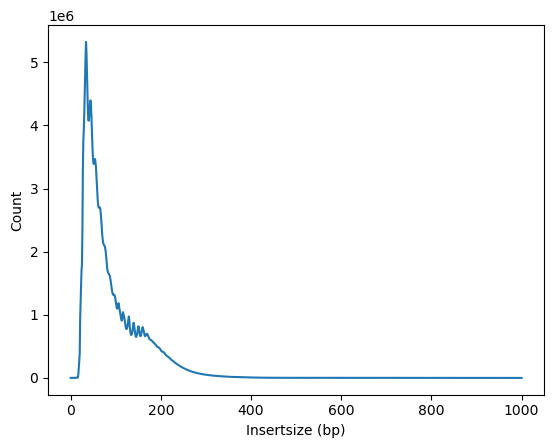

In [55]:
if qc_columns['mean_insertsize'] is None or qc_columns['insertsize_count'] is None and calc_mean_insertsize:
    
    if use_bam:
        atac.add_insertsize(adata, bam=bam_file, barcode_tag=barcode_tag)     
    else:
        atac.add_insertsize(adata, fragments=fragments_file, barcode_tag=barcode_tag)
        
    # update column dictionary
    qc_columns['mean_insertsize'] = 'mean_insertsize'
    qc_columns['insertsize_count'] = 'insertsize_count'
    
    # update infoprocess table
    build_legend(adata, 'mean_insertsize', 'mean_insertsize')
    build_legend(adata, 'insertsize_count', 'insertsize_count')
    
    atac.plot_insertsize(adata, barcodes=None)
    
adata.obs

### 3. promotor enrichment 

In [56]:
if qc_columns['n_fragments_in_promoters'] is None and calc_promotor_enrichment:
    overlap.pct_fragments_in_promoters(adata, gtf_file=promoters_gtf, species=species, bam_file=bam_file, cb_col=None, nproc=1)
    
    # n_total_fragments, n_fragments_in_promoters, pct_fragments_in_promoters
    # update column dictionary
    qc_columns['n_total_fragments'] = 'n_total_fragments'
    qc_columns['n_fragments_in_promoters'] = 'n_fragments_in_promoters'
    qc_columns['pct_fragments_in_promoters'] = 'pct_fragments_in_promoters'
    # update infoprocess table
    build_legend(adata, 'n_total_fragments', 'n_total_fragments')
    build_legend(adata, 'n_fragments_in_promoters', 'n_fragments_in_promoters')
    build_legend(adata, 'pct_fragments_in_promoters', 'pct_fragments_in_promoters')
    

## Inspect adata.obs

In [57]:
adata.obs

,chr1_reads,chr10_reads,chr11_reads,chr12_reads,chr13_reads,chr14_reads,chr15_reads,chr16_reads,chr17_reads,chr18_reads,...,condition,date,file,sample,n_features_by_counts,log1p_n_features_by_counts,total_counts,log1p_total_counts,insertsize_count,mean_insertsize
barcode,,,,,,,,,,,,,,,,,,,,,
TGAGGCCACGGACACA-sample3,856,514,7974,384,997,762,3684,1701,222,1437,...,AMI,08.12.2022,/mnt/agnerds/PROJECTS/extern/ext442_scATAC_Gla...,sample1,2567,7.850883,5591.0,8.629092,61668,93.52
AATTGCCGAGCGAGTA-sample3,5225,3105,3938,2289,2813,3037,3433,2165,2503,2295,...,AMI,08.12.2022,/mnt/agnerds/PROJECTS/extern/ext442_scATAC_Gla...,sample1,6648,8.802222,15034.0,9.618136,87604,85.27
CCCATGTACATCCGTA-sample3,4690,2861,5098,2319,1847,2443,4117,2211,3516,2172,...,AMI,08.12.2022,/mnt/agnerds/PROJECTS/extern/ext442_scATAC_Gla...,sample1,4636,8.441823,10717.0,9.279680,87089,90.26
TTTCTGAACAATGCGG-sample3,3743,1490,2375,1726,526,2343,983,1020,1536,512,...,AMI,08.12.2022,/mnt/agnerds/PROJECTS/extern/ext442_scATAC_Gla...,sample1,3327,8.110127,7726.0,8.952476,51976,87.43
ATCTCTAACATCCTCC-sample3,5425,2973,2932,1381,1556,4182,1633,4326,2635,3434,...,AMI,08.12.2022,/mnt/agnerds/PROJECTS/extern/ext442_scATAC_Gla...,sample1,1824,7.509335,5282.0,8.572249,108220,72.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CGACCTACTAGGGAGG-sample3,32,28,69,22,46,42,40,38,40,56,...,AMI,08.12.2022,/mnt/agnerds/PROJECTS/extern/ext442_scATAC_Gla...,sample1,167,5.123964,323.0,5.780744,1004,94.38
GAATCAGCTAGATTCC-sample3,15,40,42,24,32,52,30,54,36,20,...,AMI,08.12.2022,/mnt/agnerds/PROJECTS/extern/ext442_scATAC_Gla...,sample1,125,4.836282,243.0,5.497168,930,84.88
TTCTACATGAAATGCA-sample3,10,104,120,124,115,101,150,120,176,202,...,AMI,08.12.2022,/mnt/agnerds/PROJECTS/extern/ext442_scATAC_Gla...,sample1,249,5.521461,498.0,6.212606,2872,89.31


## Save adata to .h5ad

In [58]:
adata_output = tree.assembled_anndata
adata_output

'/mnt/workspace/jdetlef/ext_ana/processed/sample3/assembling/anndata/sample3.h5ad'

In [59]:
#Saving the data
cr.build_infor(adata, "Test_number", test)
cr.build_infor(adata, "Anndata_path", output_dir)

adata_output = tree.assembled_anndata
adata.write(filename=adata_output)

In [60]:
import os
import shutil
repo_path = os.getcwd()
notebook_name = '1_assembling.ipynb'
notebook_path = os.path.join(repo_path, notebook_name)
notebook_copy = os.path.join(tree.assemble_dir , notebook_name)
shutil.copyfile(notebook_path, notebook_copy)

'/mnt/workspace/jdetlef/ext_ana/processed/sample3/assembling/1_assembling.ipynb'